In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# GPU设置

In [2]:
import os
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# 搭建数据集

In [3]:
from Pkgs.Ds_Builder import Dataset

Ds = Dataset(
    file_train = '..\\Data\\fashion-mnist_train.csv', 
    label_length = 1, 
    label_preprocessing = 'One_hot', 
    data_preprocessing = '0-1')

Ds.set_test_data('..\\Data\\fashion-mnist_test.csv')

Training_samples: 60000
Testing_samples: 10000


# 搭建ZZ_NET

In [9]:
from Pkgs.ZZ_Net_Builder import ZZ_Net

ZZ = ZZ_Net(
    NN_type = 'C',
    task_name = 'Fashion-Mnist',
    inputs = Ds.input_length,
    outputs = Ds.output_length,
    nodes = 200,
    levels = 5,
    stacks = 20,
    augmentation = ['Noise(0.0)', 'Mask(0.2)'],
    activation = tf.nn.gelu,
    normalization = tf.keras.layers.LayerNormalization,
    dropout_rate = 0.1)

Model: "zz_block_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
starter_block_2 (Starter_blo multiple                  157000    
_________________________________________________________________
res_block_1 (Res_block)      multiple                  81200     
_________________________________________________________________
res_block_2 (Res_block)      multiple                  81200     
_________________________________________________________________
res_block_3 (Res_block)      multiple                  81200     
_________________________________________________________________
res_block_4 (Res_block)      multiple                  81200     
_________________________________________________________________
res_block_5 (Res_block)      multiple                  81200     
_________________________________________________________________
res_block_6 (Res_block)      multiple                  8

# 训练ZZ_NET

In [5]:
from Pkgs.ZZ_Net_Trainer import ZZ_Trainer

zzT = ZZ_Trainer(Ds, ZZ, total_iteration = 50000, learning_rate = 1e-3, batch_size = 200)
zzT.train(zzT.total_iteration)

0 , Train:  0.92807  , Test:  0.91268 , Accuracy:  8.8 % ,  9.7 %.
1000 , Train:  0.04265  , Test:  0.05355 , Accuracy:  85.0 % ,  83.0 %.
2000 , Train:  0.03076  , Test:  0.03834 , Accuracy:  88.8 % ,  86.8 %.
3000 , Train:  0.02597  , Test:  0.03013 , Accuracy:  90.9 % ,  88.2 %.
4000 , Train:  0.02383  , Test:  0.03035 , Accuracy:  91.4 % ,  88.6 %.
5000 , Train:  0.02214  , Test:  0.02898 , Accuracy:  91.5 % ,  89.6 %.
6000 , Train:  0.02187  , Test:  0.03005 , Accuracy:  91.4 % ,  89.2 %.
7000 , Train:  0.01974  , Test:  0.03115 , Accuracy:  92.3 % ,  89.9 %.
8000 , Train:  0.01857  , Test:  0.02772 , Accuracy:  92.4 % ,  90.6 %.
9000 , Train:  0.01532  , Test:  0.02943 , Accuracy:  93.9 % ,  89.4 %.
10000 , Train:  0.01658  , Test:  0.02794 , Accuracy:  93.3 % ,  91.0 %.
11000 , Train:  0.01442  , Test:  0.02553 , Accuracy:  94.7 % ,  91.4 %.
12000 , Train:  0.01231  , Test:  0.02658 , Accuracy:  95.1 % ,  90.8 %.
13000 , Train:  0.01129  , Test:  0.03367 , Accuracy:  95.8 % ,  9

# 验证ZZ_NET

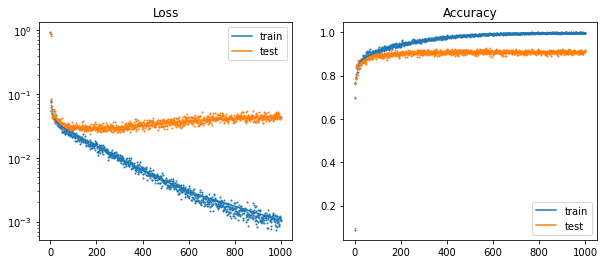

[[879   0  16  16   1   0  81   0   7   0]
 [  4 986   1   8   0   0   0   0   1   0]
 [ 17   2 841  11  74   0  52   0   3   0]
 [ 13   8  10 922  29   0  16   0   2   0]
 [  1   0  62  19 865   0  52   0   1   0]
 [  0   0   0   0   0 952   0  30   2  16]
 [119   0  66  19  46   0 744   0   6   0]
 [  0   0   0   0   0   2   0 955   0  43]
 [  1   0   3   3   4   0   6   2 981   0]
 [  0   0   0   0   0   2   0  31   0 967]]


,1000,2000,5000,10000,20000,30000,50000
Training_loss,0.039568,0.032340,0.023488,0.015483,0.006383,0.002911,0.001045
Testing_loss,0.042904,0.036933,0.029978,0.028884,0.031493,0.038405,0.044093
Training_accuracy,0.857773,0.880546,0.911045,0.941636,0.977545,0.990227,0.997433
Testing_accuracy,0.852227,0.867773,0.893500,0.904091,0.910045,0.908182,0.909200


In [6]:
zzT.Validate([1000, 2000, 5000, 10000, 20000, 30000, 50000, 100000, 150000, 200000])

In [ ]:
ZZ.visualize(Ds.data_train[0:100])

# 输出ZZ_NET结果

In [7]:
label_train_predict = ZZ.predict(Ds.data_train, batch_size = 1000)
label_test_predict = ZZ.predict(Ds.data_test, batch_size = 1000)

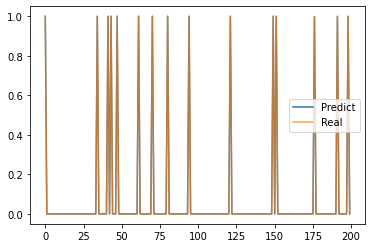

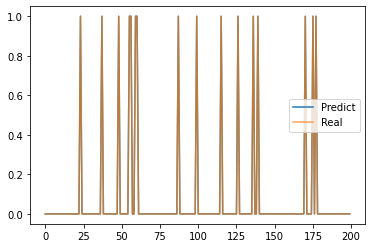

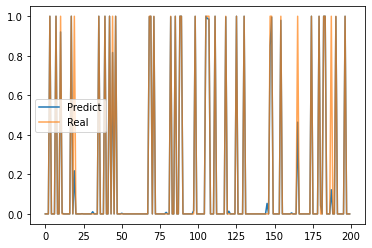

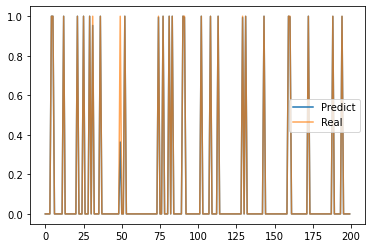

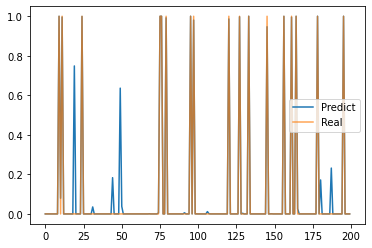

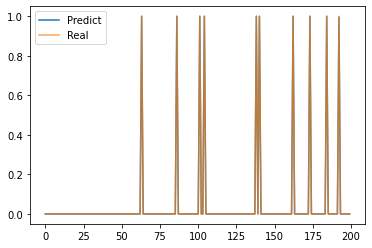

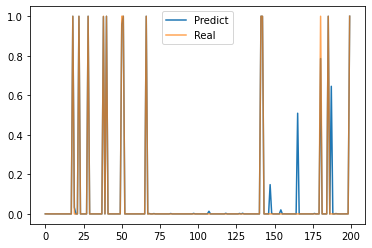

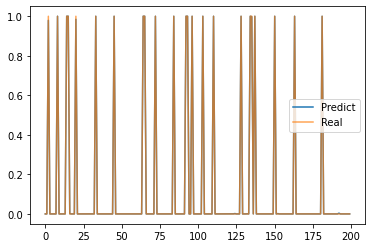

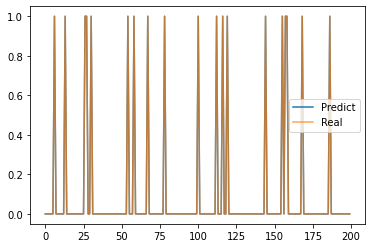

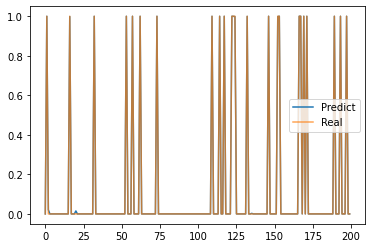

In [8]:
#画一些图什么的Train
Rnd_init = int(np.random.random()*(len(label_train_predict) - 200))
for i in range(Ds.output_length):
    plt.plot(np.arange(200), label_train_predict[Rnd_init:Rnd_init + 200, i], label = 'Predict')
    plt.plot(np.arange(200), Ds.label_train[Rnd_init:Rnd_init + 200, i], label = 'Real', alpha = .7)
    plt.legend()
    plt.show()

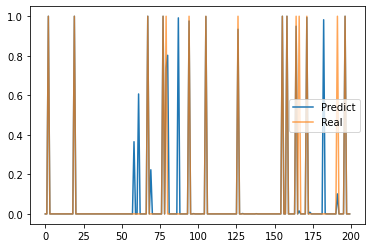

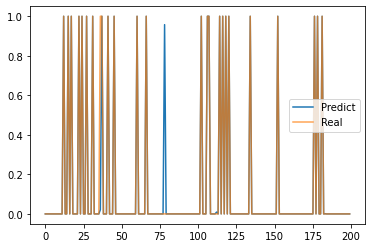

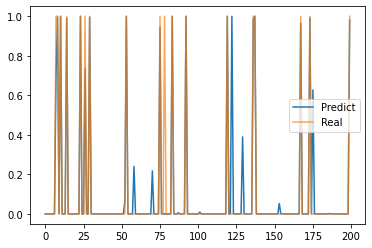

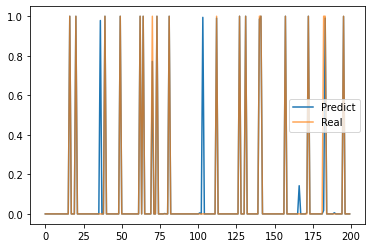

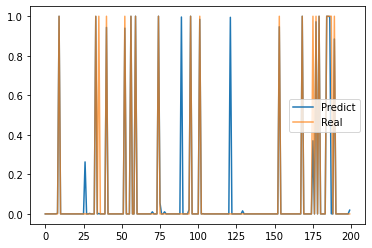

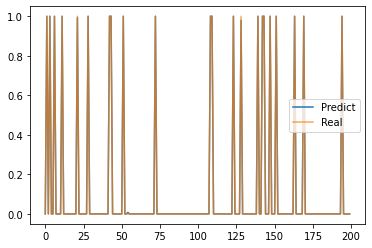

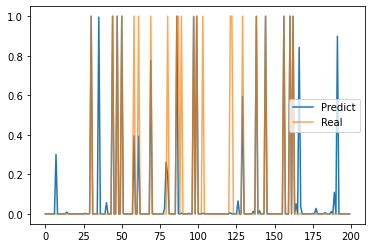

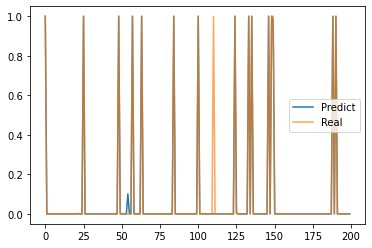

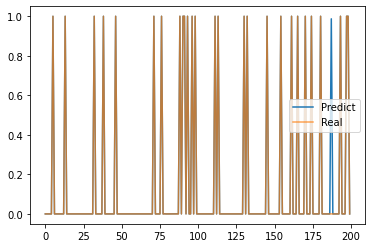

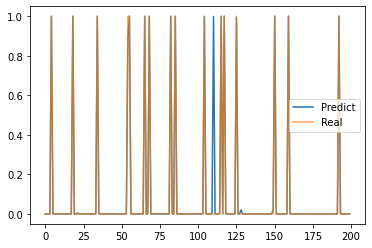

In [9]:
#又画一些图什么的Test
Rnd_init = int(np.random.random()*(len(label_test_predict) - 200))
for i in range(Ds.output_length):
    plt.plot(np.arange(200), label_test_predict[Rnd_init:Rnd_init + 200, i], label = 'Predict')
    plt.plot(np.arange(200), Ds.label_test[Rnd_init:Rnd_init + 200, i], label = 'Real', alpha = .7)
    plt.legend()
    plt.show()

In [10]:
#输出结果
label_predict = Ds.recover_label(label_test_predict)
label_real = Ds.recover_label(Ds.label_test)

labels = ['Predicted_' + str(i) for i in range(label_real.shape[1])] + ['Real_' + str(i) for i in range(label_real.shape[1])]
result = np.concatenate((label_predict, label_real), axis = 1)

pd.DataFrame(result, columns = labels).to_csv('Results\\Result_' + ZZ.task_name + '.csv', index = False)

# 保存ZZ_NET模型

In [11]:
tf.keras.models.save_model(ZZ, 'Saved_Models\\ZZ' + ZZ.type + '_' + ZZ.task_name)

INFO:tensorflow:Assets written to: Saved_Models\ZZC_Fashion-Mnist\assets


# 剪裁和保存Dataset

In [12]:
import copy
Ds2 = copy.deepcopy(Ds)
Ds2.slim()

Dsfile = open('Ds\\Ds_' + ZZ.task_name,'wb')
pickle.dump(Ds2, Dsfile)
Dsfile.close()

This Dataset has been pruned.


# 加载模型实现端到端推理

In [13]:
from Pkgs.ZZ_Net_Portable import Portable_ZZ

ZZr = Portable_ZZ('Saved_Models\\ZZ' + ZZ.type + '_' + ZZ.task_name, 'Ds\\Ds_' + ZZ.task_name)